In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_gray = cv2.imread('/zhome/ac/d/174101/thesis/test.jpeg')
print(image_gray)

[[[ 82  82  82]
  [ 67  67  67]
  [ 45  45  45]
  ...
  [ 68  68  68]
  [ 11  11  11]
  [  2   2   2]]

 [[ 45  45  45]
  [ 16  16  16]
  [ 64  64  64]
  ...
  [ 62  62  62]
  [ 72  72  72]
  [ 26  26  26]]

 [[ 58  58  58]
  [ 39  39  39]
  [ 28  28  28]
  ...
  [ 83  83  83]
  [ 55  55  55]
  [ 65  65  65]]

 ...

 [[137 137 137]
  [ 82  82  82]
  [125 125 125]
  ...
  [171 171 171]
  [153 153 153]
  [153 153 153]]

 [[139 139 139]
  [117 117 117]
  [133 133 133]
  ...
  [101 101 101]
  [ 87  87  87]
  [ 63  63  63]]

 [[135 135 135]
  [145 145 145]
  [132 132 132]
  ...
  [100 100 100]
  [120 120 120]
  [ 82  82  82]]]


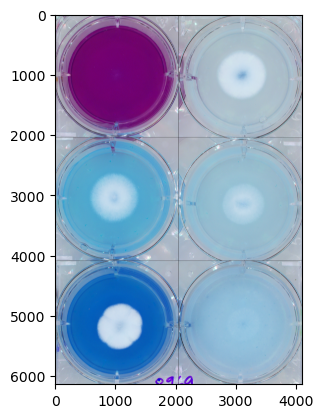

In [3]:
def add_fourier_noise(image):
    # Convert image to float32
    img_float32 = np.float32(image)

    # Perform Fourier Transform on each channel separately
    channels = cv2.split(img_float32)
    for i in range(len(channels)):
        dft = cv2.dft(channels[i], flags=cv2.DFT_COMPLEX_OUTPUT)
        
        # Split complex values into magnitude and phase
        magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
        
        # Add random noise to magnitude and phase
        magnitude_noise = magnitude + np.random.normal(loc=0, scale=10, size=magnitude.shape)
        phase_noise = phase + np.random.normal(loc=0, scale=0.1, size=phase.shape)
        
        # Convert back to complex values
        complex_dft_noise = cv2.polarToCart(magnitude_noise, phase_noise)
        
        # Perform inverse Fourier Transform
        inverse_dft = cv2.idft(complex_dft_noise, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
        
        # Store modified channel
        channels[i] = np.uint8(inverse_dft)
    
    # Merge channels back to get the modified image
    modified_image = cv2.merge(channels)
    
    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg')  # Load your RGB image
modified_image = add_fourier_noise(image)

plt.imshow(image)

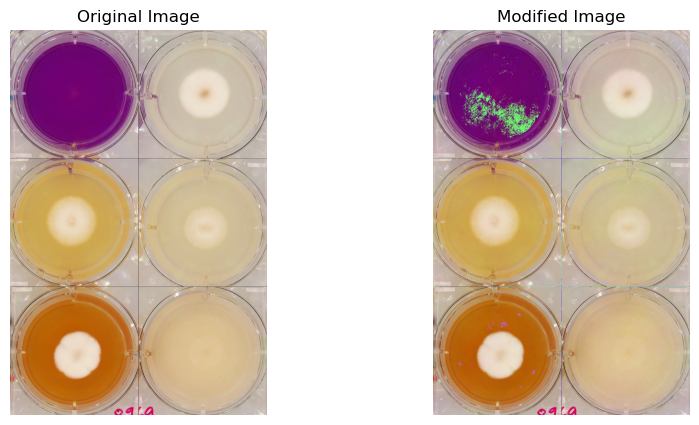

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32
    img_float32 = np.float32(image)

    # Perform Fourier Transform on each channel separately
    channels = cv2.split(img_float32)
    modified_channels = []
    for i in range(len(channels)):
        dft = np.fft.fft2(channels[i])
        
        # Split complex values into magnitude and phase
        magnitude = np.abs(dft)
        phase = np.angle(dft)
        
        # Add random noise to magnitude and phase
        magnitude_noise = magnitude + np.random.normal(loc=0, scale=10, size=magnitude.shape)
        phase_noise = phase + np.random.normal(loc=0, scale=0.1, size=phase.shape)
        
        # Reconstruct complex values
        complex_dft_noise = magnitude_noise * np.exp(1j * phase_noise)
        
        # Perform inverse Fourier Transform
        inverse_dft = np.fft.ifft2(complex_dft_noise)
        
        # Store modified channel
        modified_channels.append(np.uint8(np.real(inverse_dft)))
    
    # Merge channels back to get the modified image
    modified_image = cv2.merge(modified_channels)
    
    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg')  # Load your RGB image
modified_image = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.show()


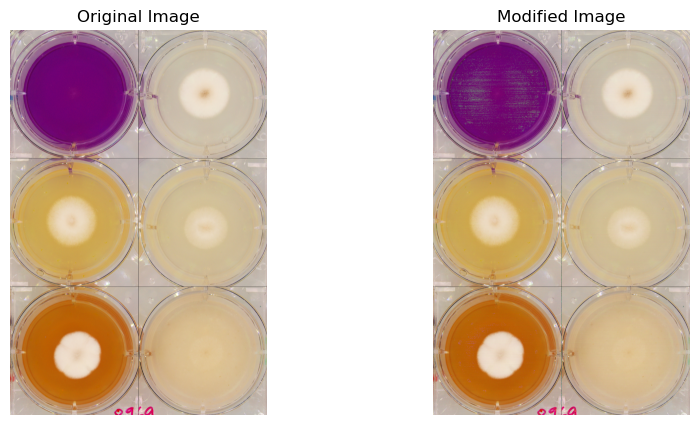

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32
    img_float32 = np.float32(image)

    # Perform Fourier Transform on each channel separately
    dft = np.fft.fft2(img_float32)
    
    # Split complex values into magnitude and phase
    magnitude = np.abs(dft)
    phase = np.angle(dft)
    
    # Add random noise to magnitude and phase
    magnitude_noise = magnitude + np.random.normal(loc=0, scale=5, size=magnitude.shape)
    phase_noise = phase + np.random.normal(loc=0, scale=0.05, size=phase.shape)
    
    # Reconstruct complex values
    complex_dft_noise = magnitude_noise * np.exp(1j * phase_noise)
    
    # Perform inverse Fourier Transform
    inverse_dft = np.fft.ifft2(complex_dft_noise)
    
    # Ensure resulting image has real values
    modified_image = np.uint8(np.real(inverse_dft))
    
    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') 
modified_image = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


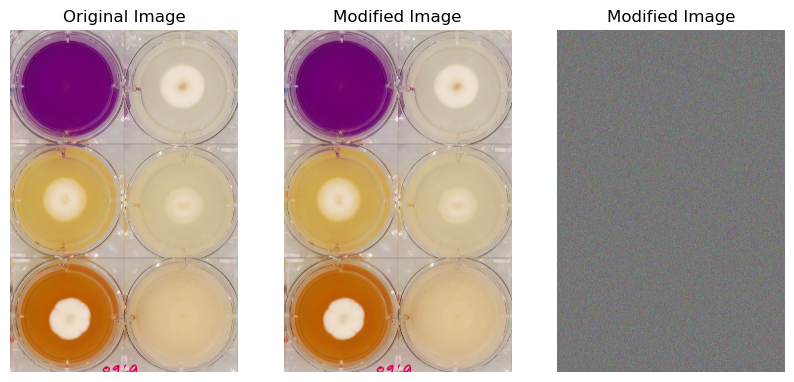

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32
    img_float32 = np.float32(image)

    # Perform Fourier Transform on each channel separately
    dft = np.fft.fft2(img_float32)
    
    # Split complex values into magnitude and phase
    magnitude = np.abs(dft)
    phase = np.angle(dft)
    
    # Add random noise to magnitude
    magnitude_noise = magnitude + np.random.normal(loc=0, scale=5, size=magnitude.shape)
    noise = np.random.normal(loc=0, scale=5, size=magnitude.shape)
    # Reconstruct complex values
    complex_dft_noise = magnitude_noise * np.exp(1j * phase)
    
    # Perform inverse Fourier Transform
    inverse_dft = np.fft.ifft2(complex_dft_noise)
    
    # Ensure resulting image has real values
    modified_image = np.uint8(np.real(inverse_dft))
    
    return modified_image, noise


image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') 
modified_image, noise = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noise)
plt.title('Modified Image')
plt.axis('off')

plt.show()

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    rbg = []
    # Convert image to float32
    channel_mask = np.random.rand(*magnitude_spectrum.shape)
    for channel in range(0,3):
        img_float32 = image[:,:,channel].astype(np.float32) / 255.0
        dft = cv2.dft(img_float32, img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
        
        magnitude_noise = np.multiply(magnitude_spectrum, channel_mask)
        
    
    #dft_shift = np.fft.fftshift(dft)
    
    # Split complex values into magnitude and phase
    #magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
    
    # Generate random noise with the same size as the magnitude
    #mask = np.random.rand(*magnitude_spectrum.shape)
    
    # Add random noise to magnitude
    #magnitude_noise = magnitude * noise_image
    #magnitude_noise = np.multiply(magnitude_spectrum, mask)
    # Reconstruct complex values
    #complex_dft_noise = magnitude_noise * np.exp(1j * phase_spectrum)
    
    # Perform inverse Fourier Transform
    fft_ifft_shift = np.fft.ifftshift(complex_dft_noise)
    inverse_dft = cv2.idft(fft_ifft_shift)
    
    # Ensure resulting image has real values
    modified_image = np.uint8(np.real(inverse_dft))
    
    return modified_image, mask

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') 

modified_image, noise = add_fourier_noise(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noise)
plt.title('Noise')
plt.axis('off')


plt.show()


UnboundLocalError: cannot access local variable 'magnitude_spectrum' where it is not associated with a value

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32 and scale to range [0, 1]
    img_float32 = image.astype(np.float32) #/ 255.0
    noise_image = np.random.rand(6138, 4091)
    # Perform Fourier Transform on each channel separately
    channels = cv2.split(img_float32)
    modified_channels = []
    for channel in channels:
        # Perform Fourier Transform on the channel
        dft = np.fft.fft2(channel)
        
        # Split complex values into magnitude and phase
        magnitude = np.abs(dft)
        phase = np.angle(dft)
        
        # Generate random noise with the same size as the magnitude
        
        print(magnitude.shape)
        # Add random noise to magnitude scaled to range [0, 1]
        #magnitude_noise = magnitude * noise_image
        magnitude_noise = np.multiply(magnitude, noise_image)
        # Reconstruct complex values
        complex_dft_noise = magnitude_noise * np.exp(1j * phase)
        
        # Perform inverse Fourier Transform
        inverse_dft = np.fft.ifft2(complex_dft_noise)
        
        
        modified_channel = np.real(inverse_dft)
        modified_channels.append(modified_channel)
    
    # Combine modified channels into an RGB image
    modified_image = cv2.merge(modified_channels)
    
    # Scale back to range [0, 255] and convert to uint8
    modified_image = np.uint8(modified_image)
    
    return modified_image, magnitude_noise, magnitude, phase

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') # Load your RGB image
modified_image, magnitude_noise, magnitude, phase = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 6, 2)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
#plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 6, 4)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(phase)
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 6, 5)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(magnitude)
plt.title('Modified Image')
plt.axis('off')


plt.subplot(1, 6, 6)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(magnitude_noise)
plt.title('Modified Image')
plt.axis('off')



plt.show()


MemoryError: Unable to allocate 287. MiB for an array with shape (6138, 4091, 3) and data type float32

MemoryError: Unable to allocate 383. MiB for an array with shape (6138, 4091) and data type complex128

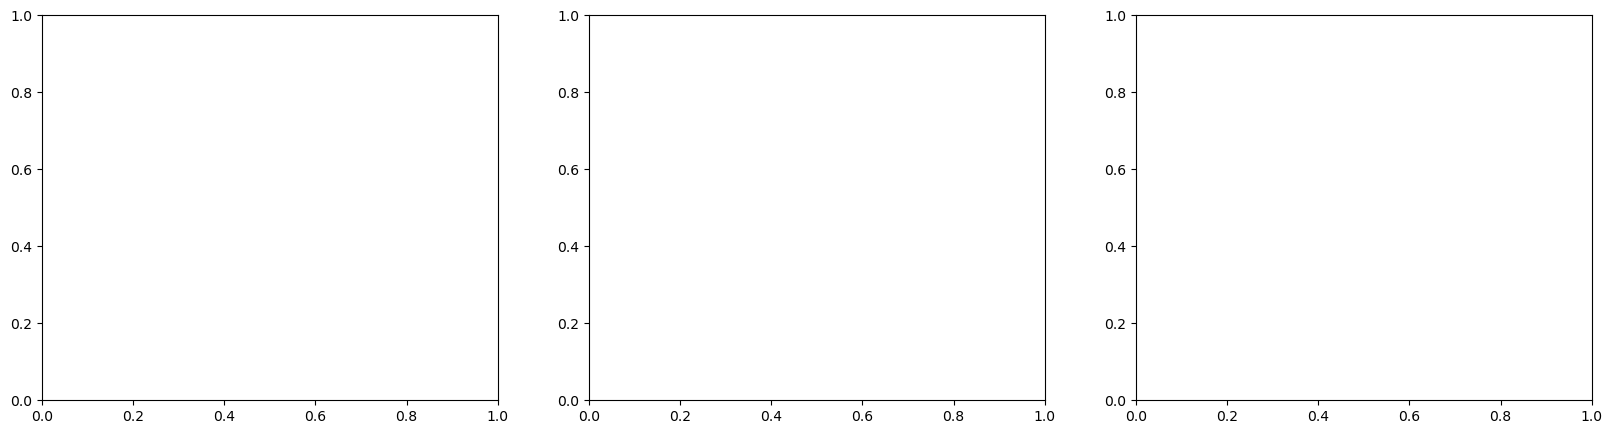

In [35]:
def rgb_transform(cargoship_rgb, channel):
    rgb_fft = np.fft.fftshift(np.fft.fft2(
                              cargoship_rgb[:, :, channel]))
    mask = np.random.rand(*rgb_fft.shape)
    rgb_fft = rgb_fft * mask
    rgb = abs(np.fft.ifft2(rgb_fft))
    return rgb.clip(0, 255)

image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg')

figure, axis = plt.subplots(1,3, figsize=(20,5))

red_channel = rgb_transform(image, 0)
green_channel = rgb_transform(image, 1)
blue_channel = rgb_transform(image, 2)



fig, ax = plt.subplots(1, 2, figsize=(15,15))
new_image = np.dstack([red_channel.astype(int), 
                       green_channel.astype(int), 
                       blue_channel.astype(int)])

ax[0].imshow(image)
ax[0].set_title('Cargo Ship in RGB');
ax[1].imshow(new_image);
ax[1].set_title('Transformed Cargo Ship in RGB');

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32 and scale to range [0, 1]
    img_float32 = image.astype(np.float32) / 255.0

    # Split image into channels
    channels = cv2.split(img_float32)
    modified_channels = []

    for channel in channels:
        # Perform Fourier Transform on the channel
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        
        # Split complex values into magnitude and phase
        magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
        
        # Generate random noise with the same size as the magnitude
        noise_image = np.random.rand(*magnitude.shape)
        
        # Multiply magnitude by the noise
        magnitude_noise = magnitude * noise_image
        
        # Reconstruct complex values
        complex_dft_noise = cv2.merge([magnitude_noise * np.cos(phase), magnitude_noise * np.sin(phase)])
        
        # Perform inverse Fourier Transform
        inverse_dft = cv2.idft(complex_dft_noise, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
        
        # Ensure resulting image has real values and scale back to [0, 1]
        modified_channel = np.real(inverse_dft)
        modified_channels.append(modified_channel)
    
    # Combine modified channels into an RGB image
    modified_image = cv2.merge(modified_channels)
    
    # Scale back to range [0, 255] and convert to uint8
    modified_image = np.uint8(modified_image * 255)
    
    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') # Load your RGB image
modified_image = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
#plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

MemoryError: Unable to allocate 575. MiB for an array with shape (6138, 4091, 3) and data type float64

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32 and scale to range [0, 1]
    img_float32 = image.astype(np.float32) #/ 255.0

    # Split image into channels
    channels = cv2.split(img_float32)
    modified_channels = []

    for channel in channels:
        # Initialize list to store modified chunks
        modified_chunks = []

        # Define chunk size
        chunk_size = 100  # Adjust as needed

        # Process image in chunks
        for i in range(0, channel.shape[0], chunk_size):
            for j in range(0, channel.shape[1], chunk_size):
                # Get chunk of the image
                chunk = channel[i:i+chunk_size, j:j+chunk_size]

                # Perform Fourier Transform on the chunk
                dft = cv2.dft(chunk, flags=cv2.DFT_COMPLEX_OUTPUT)

                # Split complex values into magnitude and phase
                magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])

                # Generate random noise with the same size as the magnitude
                noise_image = np.random.rand(*magnitude.shape)

                # Multiply magnitude by the noise
                magnitude_noise = magnitude * noise_image

                # Reconstruct complex values
                complex_dft_noise = cv2.merge([magnitude_noise * np.cos(phase), magnitude_noise * np.sin(phase)])

                # Perform inverse Fourier Transform
                inverse_dft = cv2.idft(complex_dft_noise, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

                # Ensure resulting image has real values and scale back to [0, 1]
                modified_chunk = np.real(inverse_dft)

                # Append modified chunk to list
                modified_chunks.append(modified_chunk)

        # Combine modified chunks into channel
        modified_channel = np.concatenate(modified_chunks, axis=0)

        # Append modified channel to list
        modified_channels.append(modified_channel)

    # Combine modified channels into an RGB image
    modified_image = cv2.merge(modified_channels)

    # Scale back to range [0, 255] and convert to uint8
    modified_image = np.uint8(modified_image * 255)

    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg') # Load your RGB image
modified_image = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
#plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
#plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()


error: OpenCV(4.9.0) /home/conda/feedstock_root/build_artifacts/libopencv_1711055189356/work/modules/core/src/alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 100442232 bytes in function 'OutOfMemoryError'


In [3]:
from torchvision.transforms import v2
import torch

In [10]:
class ComputeMeanStdNormalize:
    def __init__(self):
        self.mean = 0.
        self.std = 0.
        self.num_samples = 0

    def __call__(self, img):
        # Incrementally update mean and std
        img = torch.tensor(img, dtype=torch.float32) / 255.  # Convert image to tensor and normalize
        self.mean += torch.mean(img, dim=(0, 1))
        self.std += torch.std(img, dim=(0, 1))
        self.num_samples += 1
        return img

    def get_mean_std(self):
        # Calculate mean and std across all batches
        return self.mean / self.num_samples, self.std / self.num_samples

In [12]:
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
img_tr = transform(image_gray)
print(img_tr) 

Image([[[0.3216, 0.2627, 0.1765,  ..., 0.2667, 0.0431, 0.0078],
        [0.1765, 0.0627, 0.2510,  ..., 0.2431, 0.2824, 0.1020],
        [0.2275, 0.1529, 0.1098,  ..., 0.3255, 0.2157, 0.2549],
        ...,
        [0.5373, 0.3216, 0.4902,  ..., 0.6706, 0.6000, 0.6000],
        [0.5451, 0.4588, 0.5216,  ..., 0.3961, 0.3412, 0.2471],
        [0.5294, 0.5686, 0.5176,  ..., 0.3922, 0.4706, 0.3216]],

       [[0.3216, 0.2627, 0.1765,  ..., 0.2667, 0.0431, 0.0078],
        [0.1765, 0.0627, 0.2510,  ..., 0.2431, 0.2824, 0.1020],
        [0.2275, 0.1529, 0.1098,  ..., 0.3255, 0.2157, 0.2549],
        ...,
        [0.5373, 0.3216, 0.4902,  ..., 0.6706, 0.6000, 0.6000],
        [0.5451, 0.4588, 0.5216,  ..., 0.3961, 0.3412, 0.2471],
        [0.5294, 0.5686, 0.5176,  ..., 0.3922, 0.4706, 0.3216]],

       [[0.3216, 0.2627, 0.1765,  ..., 0.2667, 0.0431, 0.0078],
        [0.1765, 0.0627, 0.2510,  ..., 0.2431, 0.2824, 0.1020],
        [0.2275, 0.1529, 0.1098,  ..., 0.3255, 0.2157, 0.2549],
        ..

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(img_tr.transpose(1, 2, 0)))
plt.show

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [9]:
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.6762, 0.6762, 0.6762])
Std of the image: tensor([0.2395, 0.2395, 0.2395])
